In [11]:
import pandas as pd

In [12]:
#descargo la data desde la web
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)


In [13]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [14]:
df.shape

(108, 2)

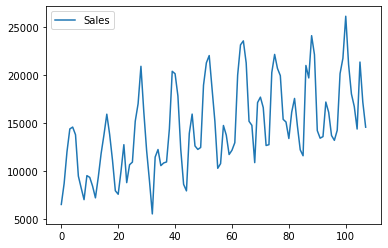

In [15]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [16]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [17]:
#cambio nombre de las columnas
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [18]:
from fbprophet import Prophet
# defino el modelo
model = Prophet()
# fit
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [20]:
forecast = model.predict(future)
# RESUMEN ¿Son tna diferentes los valores?
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12860.907888  16000.650861
1 1968-02-01  14911.718770  13267.844639  16527.918354
2 1968-03-01  20859.142961  19166.062543  22436.430855
3 1968-04-01  22883.352978  21253.330953  24468.976158
4 1968-05-01  24183.139264  22633.963032  25829.005117


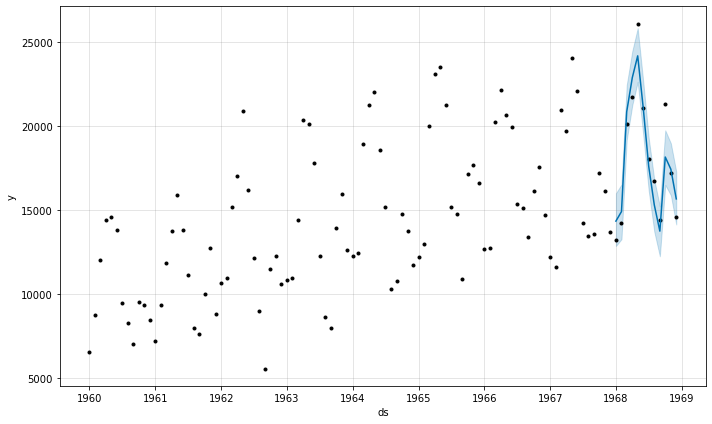

In [21]:
model.plot(forecast)
pyplot.show()

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15396.026630  13898.144741  16959.598927
1 1969-02-01  16165.838547  14513.484866  17772.554948
2 1969-03-01  21369.121163  19800.686134  22990.922014
3 1969-04-01  23494.793981  21941.004556  25066.107207
4 1969-05-01  25004.900023  23449.908885  26563.374591


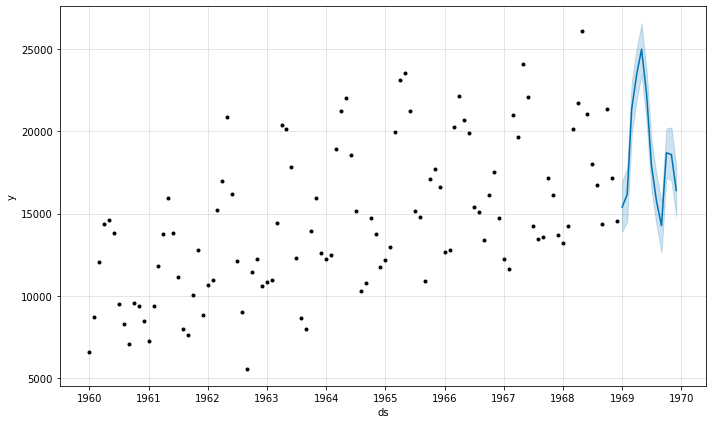

In [23]:
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()

Es fundamental desarrollar una estimación objetiva del rendimiento de un modelo de pronóstico.

Esto se puede lograr reteniendo algunos datos del modelo, como los últimos 12 meses. Luego, ajuste el modelo en la primera parte de los datos, utilícelo para hacer predicciones en la parte del paquete retenido y calcule una medida de error, como el error absoluto medio entre los pronósticos. Por ejemplo, una previsión simulada fuera de la muestra.

La puntuación proporciona una estimación de qué tan bien podríamos esperar que el modelo se desempeñe en promedio al hacer un pronóstico fuera de la muestra.

Podemos hacer esto con los datos de muestra creando un nuevo DataFrame para entrenamiento con los últimos 12 meses eliminados.







In [24]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [27]:
from sklearn.metrics import mean_absolute_error


In [28]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1370.695


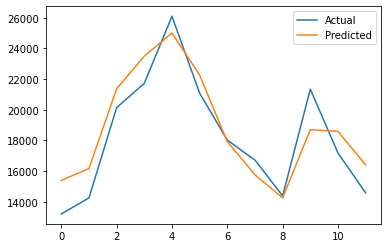

In [29]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()